# Neural Network Project

Let's wrap up this course by taking a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authorization Dataset]( ) from the UCI repository.

This data consists of 5 columns.
- variance of wavelet transformed image (continuous value)
- skewness of wavelet transformed image (continuous value)
- curtosis of wavelet transformed image (continuous value)
- entropy of image (continuous value)
- class (integer)

Where class indicates whether or not a Bank Note was authentic


### Get the Data
__Use read.csv to read the bank_note_data.csv file.__

In [1]:
df <- read.csv("bank_note_data.csv")

__Check the head of the dataframe and it's structure__

In [2]:
head(df)
str(df)
summary(df)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.62160,8.6661,-2.8073,-0.44699,0
2,4.54590,8.1674,-2.4586,-1.46210,0
3,3.86600,-2.6383,1.9242,0.10645,0
4,3.45660,9.5228,-4.0112,-3.59440,0
5,0.32924,-4.4552,4.5718,-0.98880,0
6,4.36840,9.6718,-3.9606,-3.16250,0


'data.frame':	1372 obs. of  5 variables:
 $ Image.Var : num  3.622 4.546 3.866 3.457 0.329 ...
 $ Image.Skew: num  8.67 8.17 -2.64 9.52 -4.46 ...
 $ Image.Curt: num  -2.81 -2.46 1.92 -4.01 4.57 ...
 $ Entropy   : num  -0.447 -1.462 0.106 -3.594 -0.989 ...
 $ Class     : int  0 0 0 0 0 0 0 0 0 0 ...


   Image.Var         Image.Skew        Image.Curt         Entropy       
 Min.   :-7.0421   Min.   :-13.773   Min.   :-5.2861   Min.   :-8.5482  
 1st Qu.:-1.7730   1st Qu.: -1.708   1st Qu.:-1.5750   1st Qu.:-2.4135  
 Median : 0.4962   Median :  2.320   Median : 0.6166   Median :-0.5867  
 Mean   : 0.4337   Mean   :  1.922   Mean   : 1.3976   Mean   :-1.1917  
 3rd Qu.: 2.8215   3rd Qu.:  6.815   3rd Qu.: 3.1793   3rd Qu.: 0.3948  
 Max.   : 6.8248   Max.   : 12.952   Max.   :17.9274   Max.   : 2.4495  
     Class       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.4446  
 3rd Qu.:1.0000  
 Max.   :1.0000  

### Exploratory Data Analysis
__Create whatever visualizations you are interested in.__

In [3]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

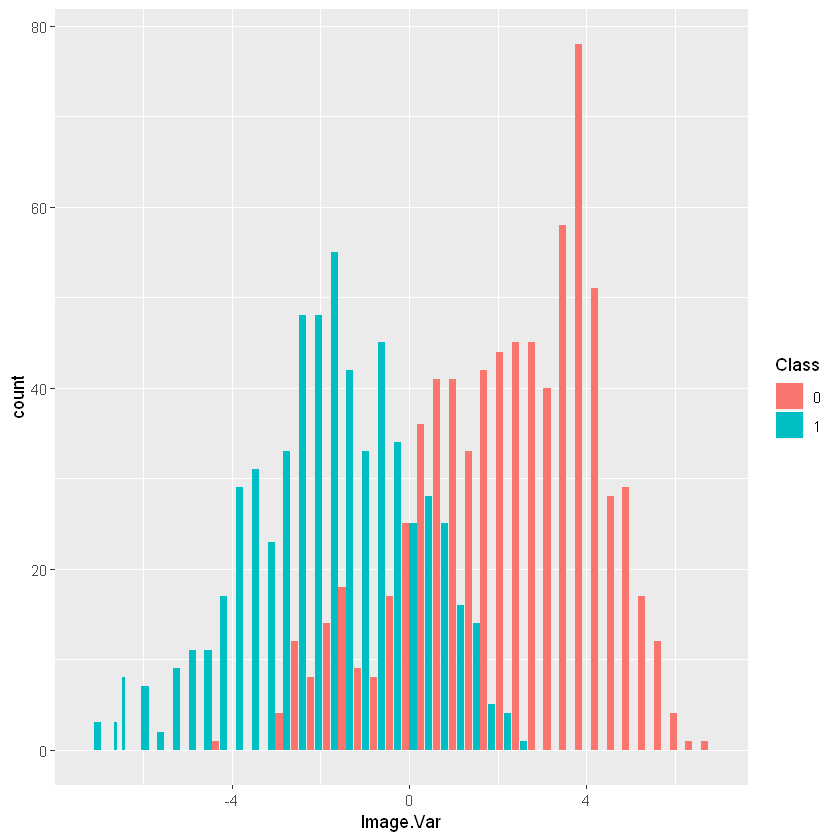

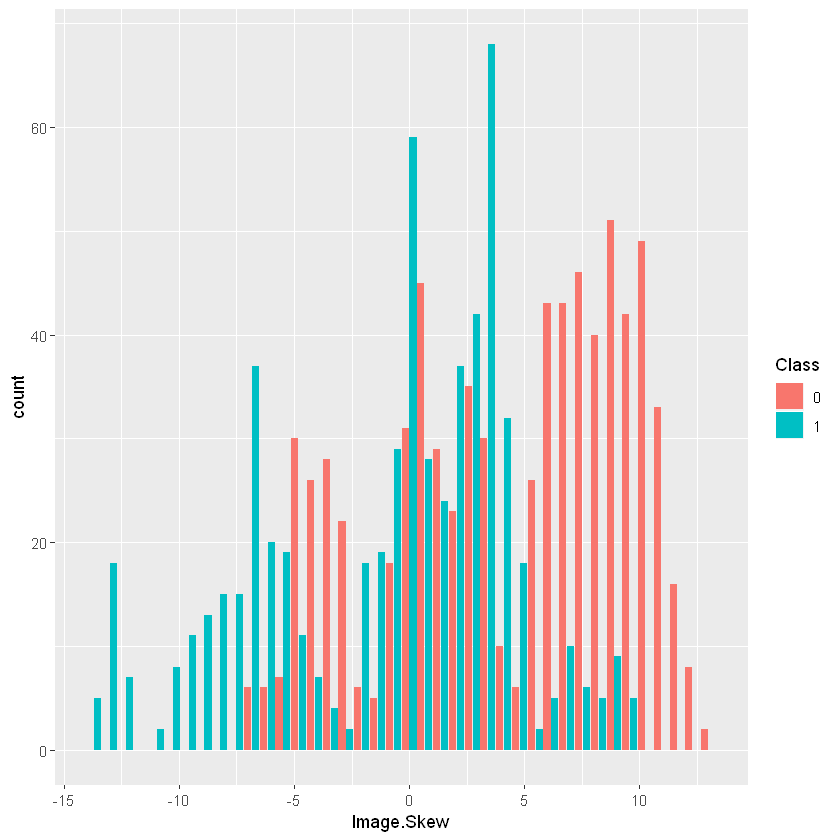

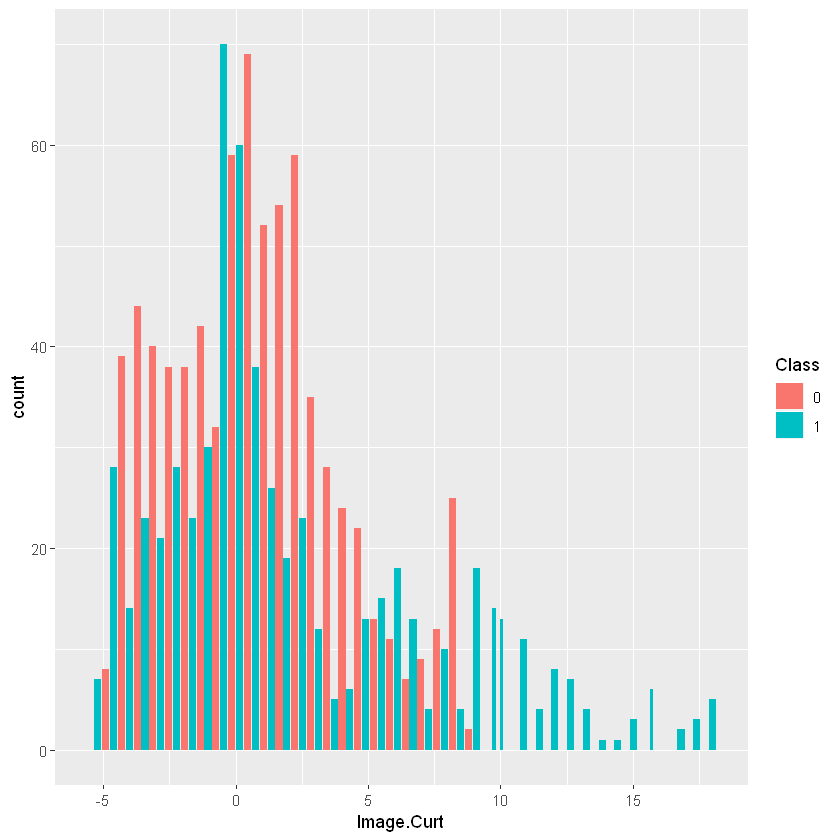

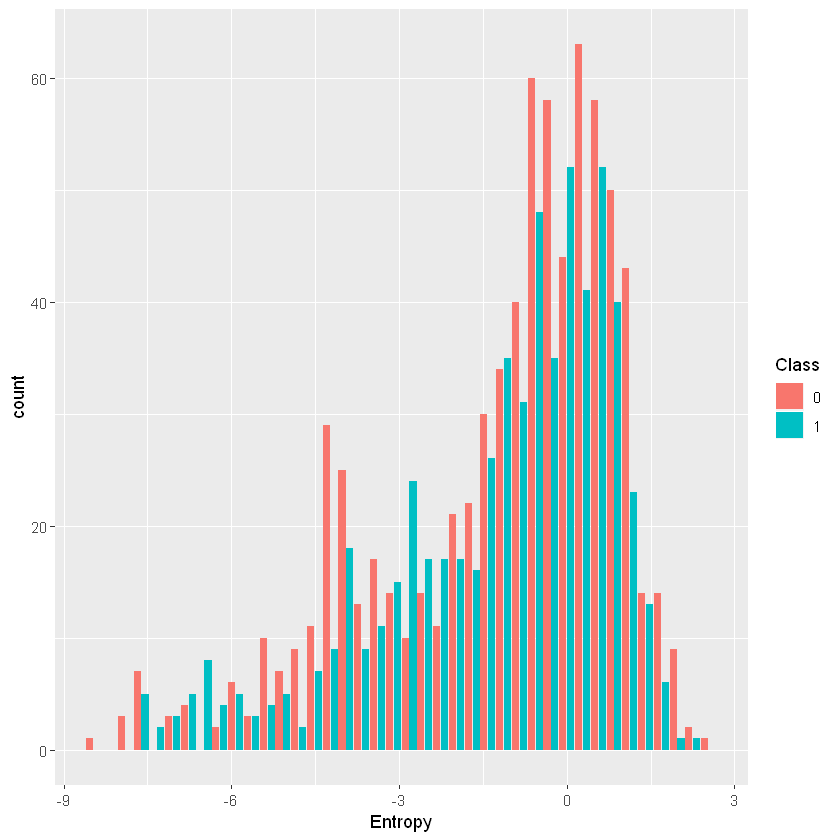

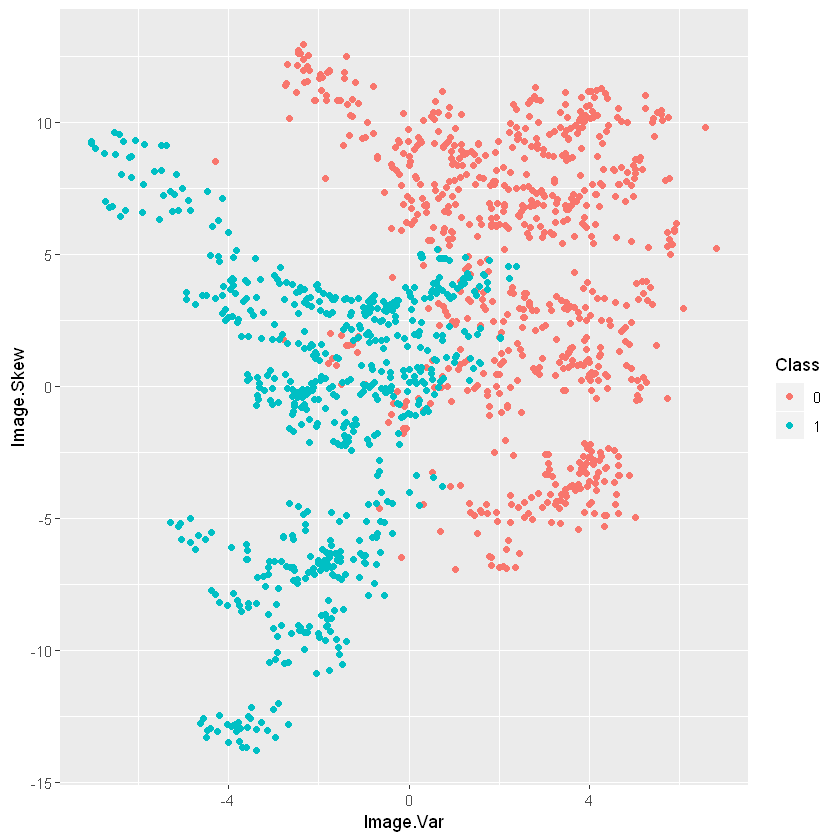

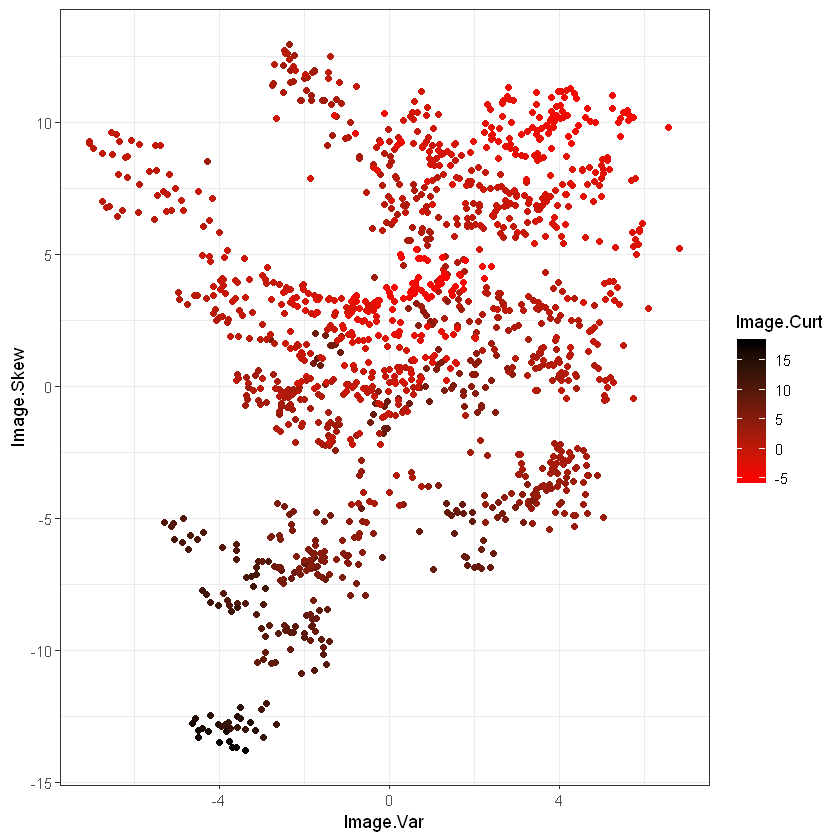

In [4]:
df2 <- df
df2$Class <- sapply(df2$Class, factor)

ggplot(data = df2, aes( x = Image.Var)) + 
geom_histogram(aes(fill = Class), bins = 40, position = 'dodge2')

ggplot(data = df2, aes( x = Image.Skew)) + 
geom_histogram(aes(fill = Class), bins = 40, position = 'dodge2')

ggplot(data = df2, aes( x = Image.Curt)) + 
geom_histogram(aes(fill = Class), bins = 40, position = 'dodge2')

ggplot(data = df2, aes( x = Entropy)) + 
geom_histogram(aes(fill = Class), bins = 40, position = 'dodge2')

ggplot(data = df2, aes( x = Image.Var, y = Image.Skew)) + 
geom_point(aes(color = Class))

ggplot(data = df2, aes( x = Image.Var, y = Image.Skew)) + 
geom_point(aes(color = Image.Curt)) +
scale_colour_gradient(low = "red", high = "black") + 
theme_bw()

### Train Test Split

__Use the caTools library to split the data into training and testing sets. Don't forget an important step before doing this!__

In [5]:
library(caTools)


maxs <- apply(df, 2, max )
mins <- apply(df, 2, min )

scaled.df <- scale(df,center = mins, scale = maxs - mins)
scaled.df <- as.data.frame(scaled.df)
summary(scaled.df)


split <- sample.split(scaled.df$Class, SplitRatio = 0.7)

train <- subset(scaled.df, split == TRUE)
test  <- subset(scaled.df, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

   Image.Var        Image.Skew       Image.Curt        Entropy      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3800   1st Qu.:0.4515   1st Qu.:0.1599   1st Qu.:0.5578  
 Median :0.5436   Median :0.6022   Median :0.2543   Median :0.7239  
 Mean   :0.5391   Mean   :0.5873   Mean   :0.2879   Mean   :0.6689  
 3rd Qu.:0.7113   3rd Qu.:0.7704   3rd Qu.:0.3647   3rd Qu.:0.8132  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     Class       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.4446  
 3rd Qu.:1.0000  
 Max.   :1.0000  

__Check the structure of the train data and note that Class is still an int data type. We won't convert it to a factor for now because the neural net requires all numeric information.__

In [6]:
str(train$Class)
train$Class <- as.integer(train$Class)
str(train$Class)

 num [1:960] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:960] 0 0 0 0 0 0 0 0 0 0 ...


### Building the Neural Network
__Call the neuralnet library__

In [7]:
library(neuralnet)

Warning message:
"package 'neuralnet' was built under R version 3.6.3"

__Use the neuralnet function to train a neural net, set linear.output = FALSE and choose 10 hidden neurons.__

In [8]:
nn <- neuralnet(Class ~ . , data = train, hidden = c(10), linear.output = FALSE)

### Predictions 
__Use compute() to grab predictions using your neural net on the test model.__

In [9]:
predicted.nn.values <- compute(nn, test[1:4])

In [10]:
head(predicted.nn.values$net.result)

1,3.808160e-05
3,2.215788e-04
4,5.249969e-05
5,6.343287e-02
6,1.157434e-05
9,8.122570e-07


__Apply the round function to the predicted values so that you only have 0s and 1s as your predicted classes.__

In [11]:
predictions <- sapply(predicted.nn.values$net.result,round)

In [12]:
head(predictions)

[1] 0 0 0 0 0 0

__Use table() to create a confusion matrix of your predictions versus the real values__



In [13]:
table(predictions,test$Class)

           
predictions   0   1
          0 229   0
          1   0 183

### Comparing Models
__Call the randomForest library__

In [14]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



__Run the code below to set the Class column of the data as a factor (randomForest needs it to be a factor, not an int like neural nets did. Then, re-do the train/test split__

In [15]:
df$Class <- factor(df$Class)
set.seed(101)

split = sample.split(df$Class, SplitRatio = 0.70)

train = subset(df, split == TRUE)
test = subset(df, split == FALSE)


__Create a randomForest model with the new adjusted training data.__


In [16]:
model <- randomForest(Class ~ . , data=train)

__Use predict() to get the preicted values from your randomForest model__

In [17]:
rf.pred <- predict(model,test)

__Use table() to create the confusion matrix.__

In [19]:
table(rf.pred,test$Class)

       
rf.pred   0   1
      0 227   1
      1   2 182

__How did the models compare?__